In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import geopandas as gpd

In [33]:
# Define a function to extract the flag of the second element of the vessel column
def extract_flag(vessel):
    if isinstance(vessel, str):
        return vessel.split(', ')[1].strip()
    else:
        return None
    
# Define a function to extract the id of the vessel first element of the vessel column
def extract_id(vessel):
    if isinstance(vessel, str):
        return vessel.split(', ')[0].strip()
    else:
        return None

# Define a function to extract the type of the vessel -2 element of the vessel column
def extract_type(vessel):
    if isinstance(vessel, str):
        return vessel.split(', ')[-2].strip()
    else:
        return None
    
# Define a function to extract the 7th element of the event_info column
def extract_event_info(event_info):
    if isinstance(event_info, str):
        return event_info.split(',')[6].strip()
    else:
        return None

### Import and Clean Data

In [46]:
# Import the whole dataset
# For this we need to import the 5 xlsx files and concatenate them
path = r'C:\\Users\\alezi\\OneDrive\\Escritorio\\Master_Thesis\\data_in\\previous_data'
files = os.listdir(path)
files_xlsx = [f for f in files if f[-4:] == 'xlsx']

# Import the 3 xlsx files and concatenate them
df = pd.DataFrame()
for f in files_xlsx:
    data = pd.read_excel(os.path.join(path, f))
    df = pd.concat([df, data], ignore_index=True)
    
df.shape

(1729898, 11)

In [50]:
# Apply the functions to the dataframe
df['flag'] = df['vessel'].apply(extract_flag)
df['id_vessel'] = df['vessel'].apply(extract_id)
df['type_vessel'] = df['vessel'].apply(extract_type)
df['port_country'] = df['event_info'].apply(extract_event_info)

In [53]:
# Filter the dataset to only include the port visits in the UK
df = df[df['port_country'] == 'GBR']

In [55]:
# Export the dataset to a parquet file
df.to_parquet(r'C:\\Users\\alezi\\OneDrive\\Escritorio\\Master_Thesis\\data_in\\previous_data\\previous_data.parquet')

### Data

In [2]:
# Import data
data = pd.read_parquet(r'C:\\Users\\alezi\\OneDrive\\Escritorio\\Master_Thesis\\data_in\\previous_data\\previous_data.parquet')

In [3]:
data

,id,type,start,end,lat,lon,regions,boundingBox,distances,vessel,event_info,flag,id_vessel,type_vessel,port_country
1,46c4674913eed94f26f7df9aaf24979c,port_visit,2014-01-20 20:16:46,2016-11-30 07:05:27,50.6949,-1.5405,"555703761, 555622034, 555588167, 5696, NAMMCO,...","-1.5596777963, 50.7128213257, -1.5521689993, 5...","0, 1, 0, 0","6a62630ef-fd00-47aa-ef5c-5d25d88f8287, GBR, fi...","1ecc5e91301dd28e48214788a79b5a00, 3, 25066.811...",GBR,6a62630ef-fd00-47aa-ef5c-5d25d88f8287,fishing,GBR
2,c38894d9692d0f25c66db328b3c3d59f,port_visit,2014-02-03 04:56:02,2017-08-01 14:35:38,55.9371,-4.6881,"5696, NAMMCO, ACAP, ICES, IWC, NASCO, NEAFC, 2...","-4.7164739658, 55.9419841792, -4.7164739658, 5...","0, 0, 0, 0","fabaf1533-3803-4b1d-7ff1-60b8784dd741, GBR, KY...","4c1382088b513c58a47f0431903c2a4e, 2, 30609.66,...",GBR,fabaf1533-3803-4b1d-7ff1-60b8784dd741,other,GBR
3,83c011467dd1ddc199b49e3210a9c3ff,port_visit,2014-04-26 19:54:46,2016-04-17 01:57:17,50.0904,-5.5209,"5696, ICES, ACAP, NEAFC, NASCO, IWC, ICCAT, NA...","-5.5449797678, 50.1034505461, -5.5346299099, 5...","0, 2, 0, 0","c8a32f508-8225-e283-2263-6d7e00dc46b9, GBR, fi...","4a0788f69346c483a04b25b27709d44e, 3, 17310.041...",GBR,c8a32f508-8225-e283-2263-6d7e00dc46b9,fishing,GBR
4,3ab1685db8b5b658b5d776e32cdba68a,port_visit,2014-09-05 12:31:14,2016-08-15 07:44:03,55.5943,-1.6235,"555556933, 555691650, 555624873, 5696, IWC, AC...","-1.6499869887, 55.583385632, -1.6499869887, 55...","0, 0, 0, 0","494e10d34-4d29-ef0a-5965-6b5df443fc5e, GBR, HA...","5d997278ccbd4824a53ad753ccc39e8a, 4, 17035.213...",GBR,494e10d34-4d29-ef0a-5965-6b5df443fc5e,fishing,GBR
5,daa794d30395f8c51818011769454d52,port_visit,2014-10-23 10:39:38,2016-11-12 15:26:55,50.1628,-5.0698,"5696, EIFAAC, 27.7, 27, 27.7.e, 27","-5.0559427278, 50.154405518, -5.0694418486, 50...","0, 0, 0, 0","eacc4dfe3-3bee-943f-cc33-5f5b477e6c4b, GBR, GO...","317059b07b4ac21840543e560a80567e, 2, 18028.788...",GBR,eacc4dfe3-3bee-943f-cc33-5f5b477e6c4b,fishing,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713320,0cc6a5cb192b3e973c84f1093e7d6fe3,port_visit,2016-08-05 06:05:29,2016-08-05 18:14:02,58.8915,-3.0665,"5696, NASCO, NAMMCO, ICES, IWC, ICCAT, NEAFC, ...","-3.0922661277, 58.9037171788, -3.0922661277, 5...","3, 3, 0, 0","bc1b5fe26-6554-5dc9-2467-ddfb8e8288aa, NLD, AF...","fab49d7eb591e8ae40f66419b67efc2e, 4, 12.1425, ...",NLD,bc1b5fe26-6554-5dc9-2467-ddfb8e8288aa,fishing,GBR
1713683,8cf7a3c766d6162a48d09b5e0aed9b4f,port_visit,2016-08-24 12:10:57,2016-08-24 12:10:57,0.0000,0.0000,None,"0.6742081373, 51.6351140601, 0.6742081373, 51....","0, 0, 0, 0","81230d03d-d3e7-9a77-7b9f-3be22b407d00, NLD, FV...","9da22de14ec8135d9faa8e12f7727788, 2, 0, 47d8de...",NLD,81230d03d-d3e7-9a77-7b9f-3be22b407d00,fishing,GBR
1720780,356d12eaea283b72ad44f3bf8f525477,port_visit,2017-09-01 05:49:01,2017-09-01 06:30:12,58.6244,-3.5092,"555557104, 5696, IWC, ICES, NEAFC, NAMMCO, NAS...","-3.5413205698, 58.6117654456, -3.5413205698, 5...","0, 0, 0, 0","1c7e9019b-b452-2d9b-805d-b1b10a211690, NLD, DI...","df4762fca060e60ab140067906c75638, 4, 0.6863888...",NLD,1c7e9019b-b452-2d9b-805d-b1b10a211690,fishing,GBR
1725680,e3aca1b8e3bd862a2535183e148512be,port_visit,2018-06-15 06:53:55,2018-06-17 06:15:10,50.4031,-3.5008,"555559217, 555557076, 555583023, 5696, IWC, NE...","-3.5080925996, 50.4221943739, -3.5080925996, 5...","2, 2, 0, 0","8670f1eb8-8371-73eb-5064-065218269092, NLD, HD...","bba5d209e5d099fdb61fcca4d225ad52, 4, 47.354166...",NLD,8670f1eb8-8371-73eb-5064-065218269092,fishing,GBR


### Graphs


C:\Users\alezi\AppData\Local\Temp\ipykernel_3628\2780429291.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=gbr_data, x='year_start', palette='Blues_d', ax=axes[0])
C:\Users\alezi\AppData\Local\Temp\ipykernel_3628\2780429291.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=non_gbr_data, x='year_start', palette='Reds_d', ax=axes[1])


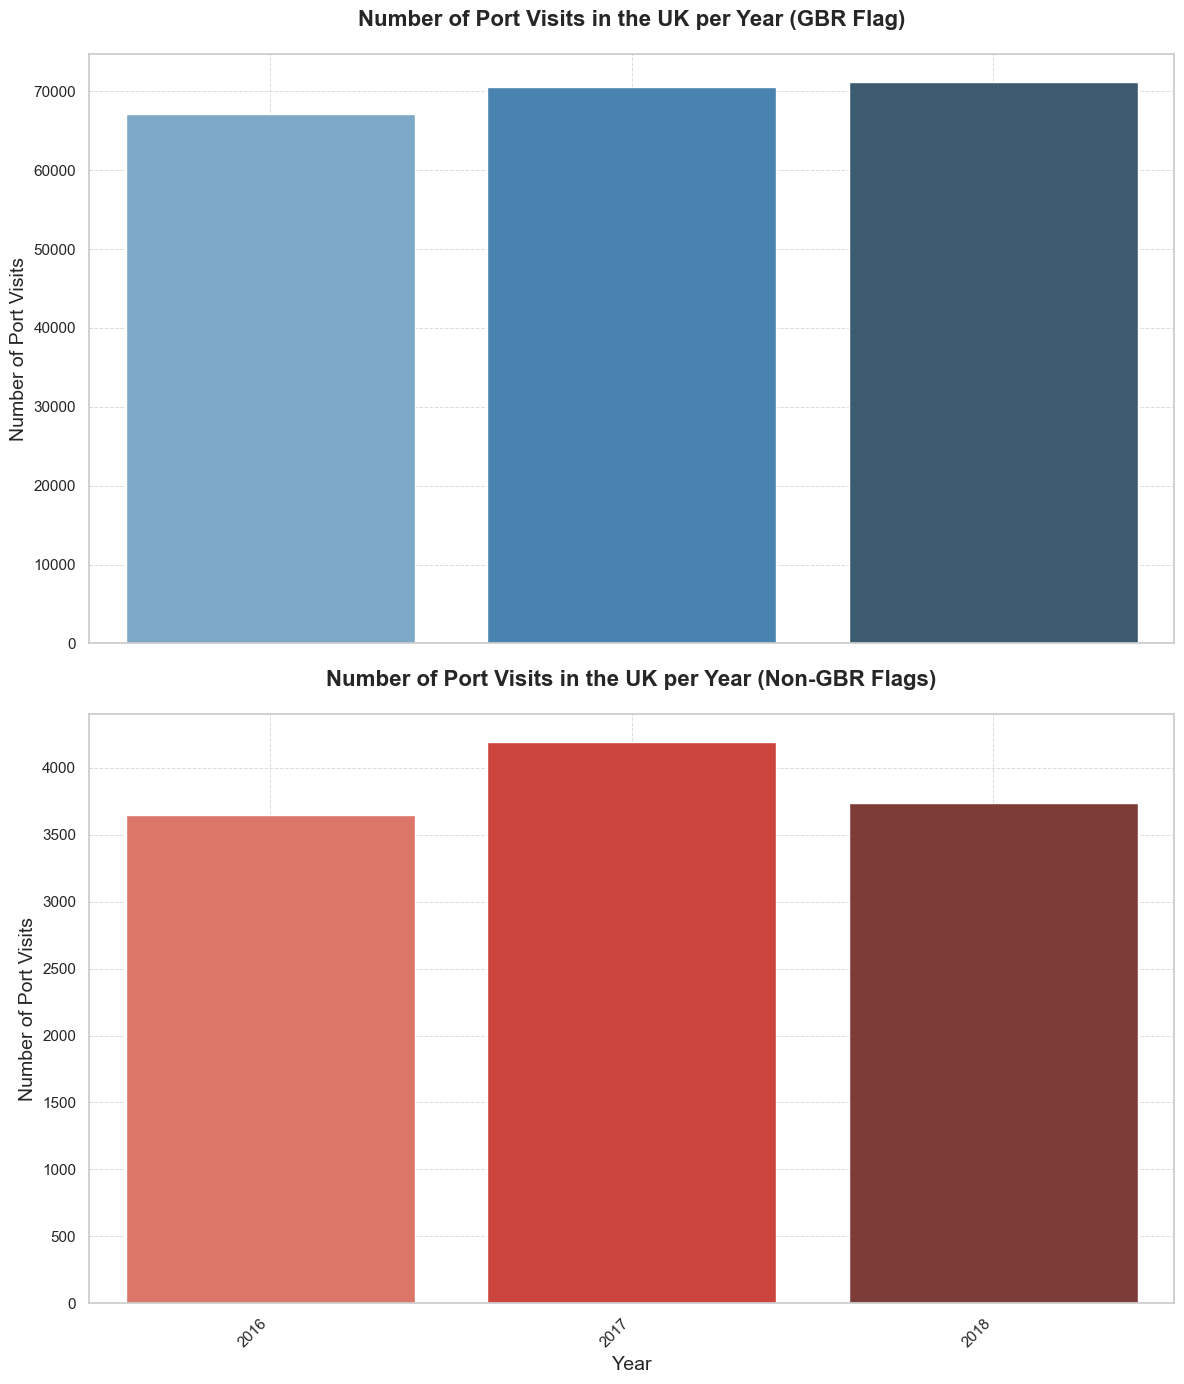

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a Seaborn theme for better aesthetics
sns.set_theme(style="whitegrid")

# Filter the data
gbr_data = gdf[gdf['flag'] == 'GBR']
non_gbr_data = gdf[gdf['flag'] != 'GBR']

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 14), sharex=True)

# Plot for GBR flag
sns.countplot(data=gbr_data, x='year_start', palette='Blues_d', ax=axes[0])
axes[0].set_title('Number of Port Visits in the UK per Year (GBR Flag)', fontsize=16, fontweight='bold', pad=20)
axes[0].set_xlabel('')
axes[0].set_ylabel('Number of Port Visits', fontsize=14)
axes[0].grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

# Plot for non-GBR flag
sns.countplot(data=non_gbr_data, x='year_start', palette='Reds_d', ax=axes[1])
axes[1].set_title('Number of Port Visits in the UK per Year (Non-GBR Flags)', fontsize=16, fontweight='bold', pad=20)
axes[1].set_xlabel('Year', fontsize=14)
axes[1].set_ylabel('Number of Port Visits', fontsize=14)
axes[1].grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

# Rotate x-axis labels for both plots
for ax in axes:
    plt.sca(ax)
    plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()
